# REGRESSION ANALYSIS

In [21]:
import pandas as pd
import numpy as np

In [22]:
clean_df = pd.read_csv("datasets/cleaned_data.csv")
clean_df.head()

,Unnamed: 0,PRICE,MILEAGE_KM,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,CAR_AGE,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,POWER,LOG_PRICE
0,0,59300.0,79000.0,40000.0,1369.0,6.0,22806.0,11583.0,1591.0,1345.0,125.0,4.773055
1,1,152888.0,600.0,80501.0,3071.0,2.0,94713.0,30886.0,1499.0,1340.0,107.0,5.184373
2,2,213800.0,15700.0,46790.0,2619.0,3.0,74121.0,44306.0,1991.0,1590.0,301.0,5.330008
3,9,147800.0,34000.0,40989.0,2349.0,4.0,58735.0,36487.0,1395.0,1470.0,147.0,5.169674
4,10,94800.0,117000.0,37605.0,1461.0,6.0,34763.0,25816.0,1969.0,1683.0,248.0,4.976808


## LINEAR REGRESSION

Intercept of Regression	: b =  [6815.15199663]
Coefficients of Regression	: a =  [[-1.23020066e-01  1.28843924e+00  1.44322943e-01 -5.50671377e-01
  -1.42477242e+02  4.58317341e-01  1.27512545e+01  9.80901286e+01
   2.05145330e+01]]



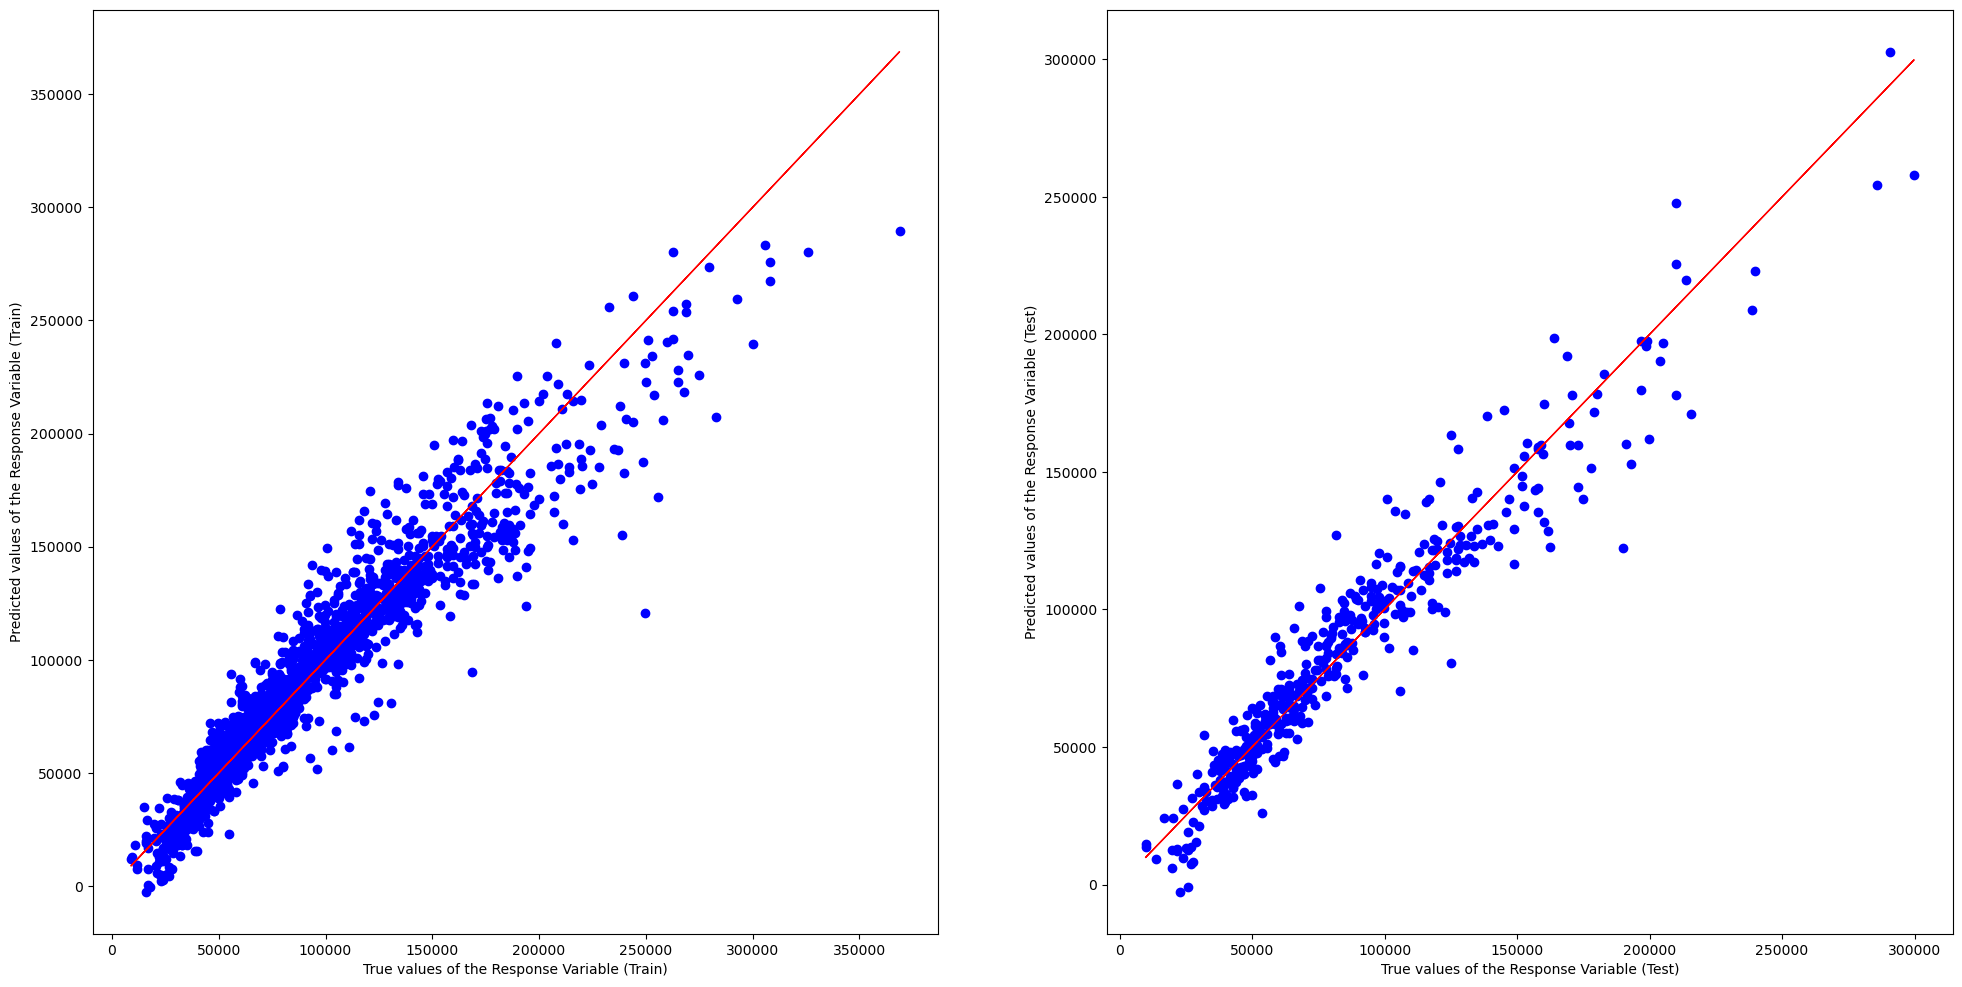

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9108108976277365
Mean Squared Error (MSE) 	: 228916168.35620442

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9224833952483229
Mean Squared Error (MSE) 	: 173928515.8928517



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

print("Intercept of Regression\t: b = ",linreg.intercept_)
print("Coefficients of Regression\t: a = ", linreg.coef_)
print()

pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])),columns=["Predictors","Coefficients"])

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot(y_train,y_train,'r-',linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred,color="blue")
axes[1].plot(y_test,y_test,'r-',linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

from sklearn.metrics import mean_squared_error,r2_score

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",linreg.score(X_train,y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform K-fold cross-validation
scores = cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

# Calculate the RMSE
rmse = np.sqrt(mean_score)
std_rmse = np.sqrt(std_score)

print(f"Root Mean Squared Error (K-fold Cross-Validation): {rmse:.2f} ± {std_rmse:.2f}")

explained_variances = cross_val_score(linreg, X, y, cv=kf, scoring='explained_variance')

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

Mean Squared Error (K-fold Cross-Validation): 223896342.11 ± 33813973.58
Root Mean Squared Error (K-fold Cross-Validation): 14963.17 ± 5814.98
Average Explained Variance (K-fold Cross-Validation): 0.911


## RANDOM FOREST REGRESSION

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


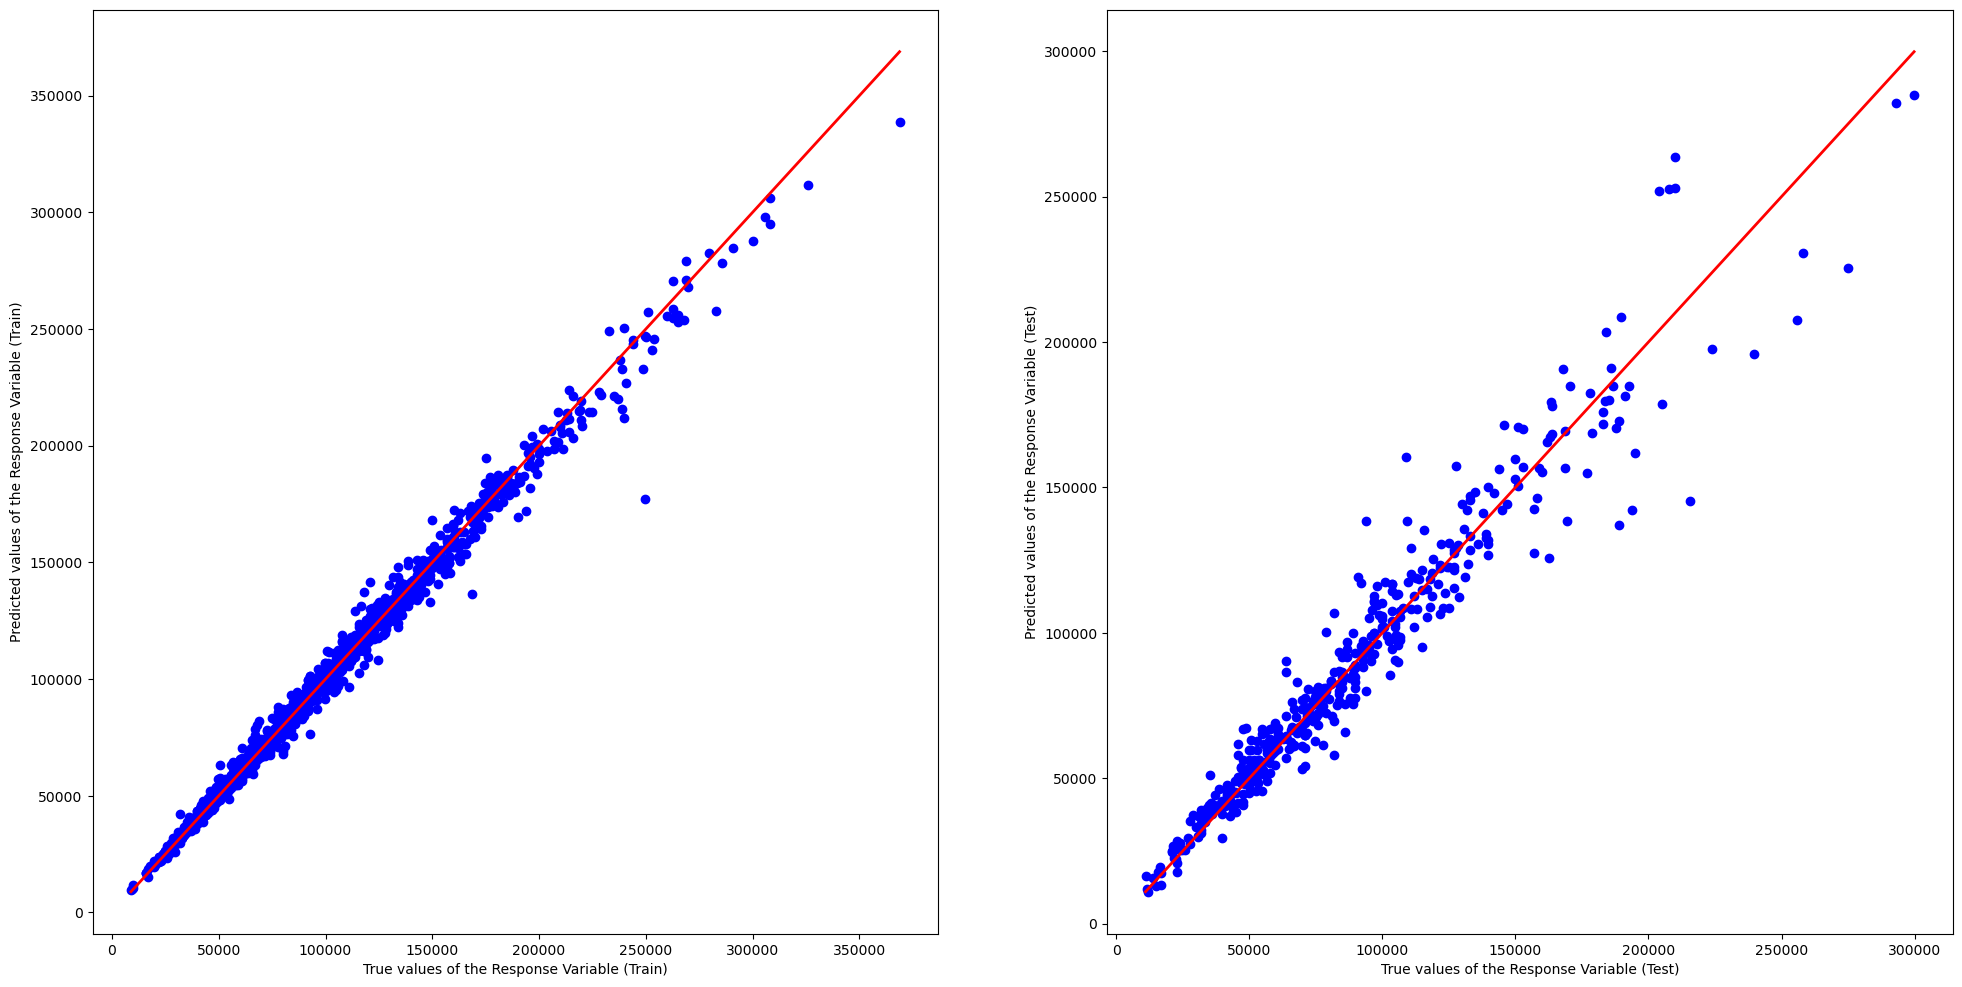

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.992314076977265
Mean Squared Error (MSE) 	: 19542811.888338577

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9382651451451105
Mean Squared Error (MSE) 	: 146425409.01333377



In [5]:
from sklearn.ensemble import RandomForestRegressor

X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

rf_regressor = RandomForestRegressor(n_estimators=200)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:",r2_score(y_train,y_train_pred))
print("Mean Squared Error (MSE) \t:",mean_squared_error(y_train,y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
print()

In [6]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform K-fold cross-validation
scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

# Calculate the RMSE
rmse = np.sqrt(mean_score)
std_rmse = np.sqrt(std_score)

print(f"Root Mean Squared Error (K-fold Cross-Validation): {rmse:.2f} ± {std_rmse:.2f}")

explained_variances = cross_val_score(rf_regressor, X, y, cv=kf, scoring='explained_variance')\

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Mean Squared Error (K-fold Cross-Validation): 146092146.97 ± 44155677.33
Root Mean Squared Error (K-fold Cross-Validation): 12086.86 ± 6644.97


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nathanpua/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Average Explained Variance (K-fold Cross-Validation): 0.943


## 

## KNN REGRESSION

Train MSE: 224024660.10961372
Test MSE: 298747598.6477826

Train RMSE: 14967.453360863154
Test RMSE: 17284.316551364784

Train Explained Variance Score: 0.9118941377200536
Test Explained Variance Score: 0.8740441309671316


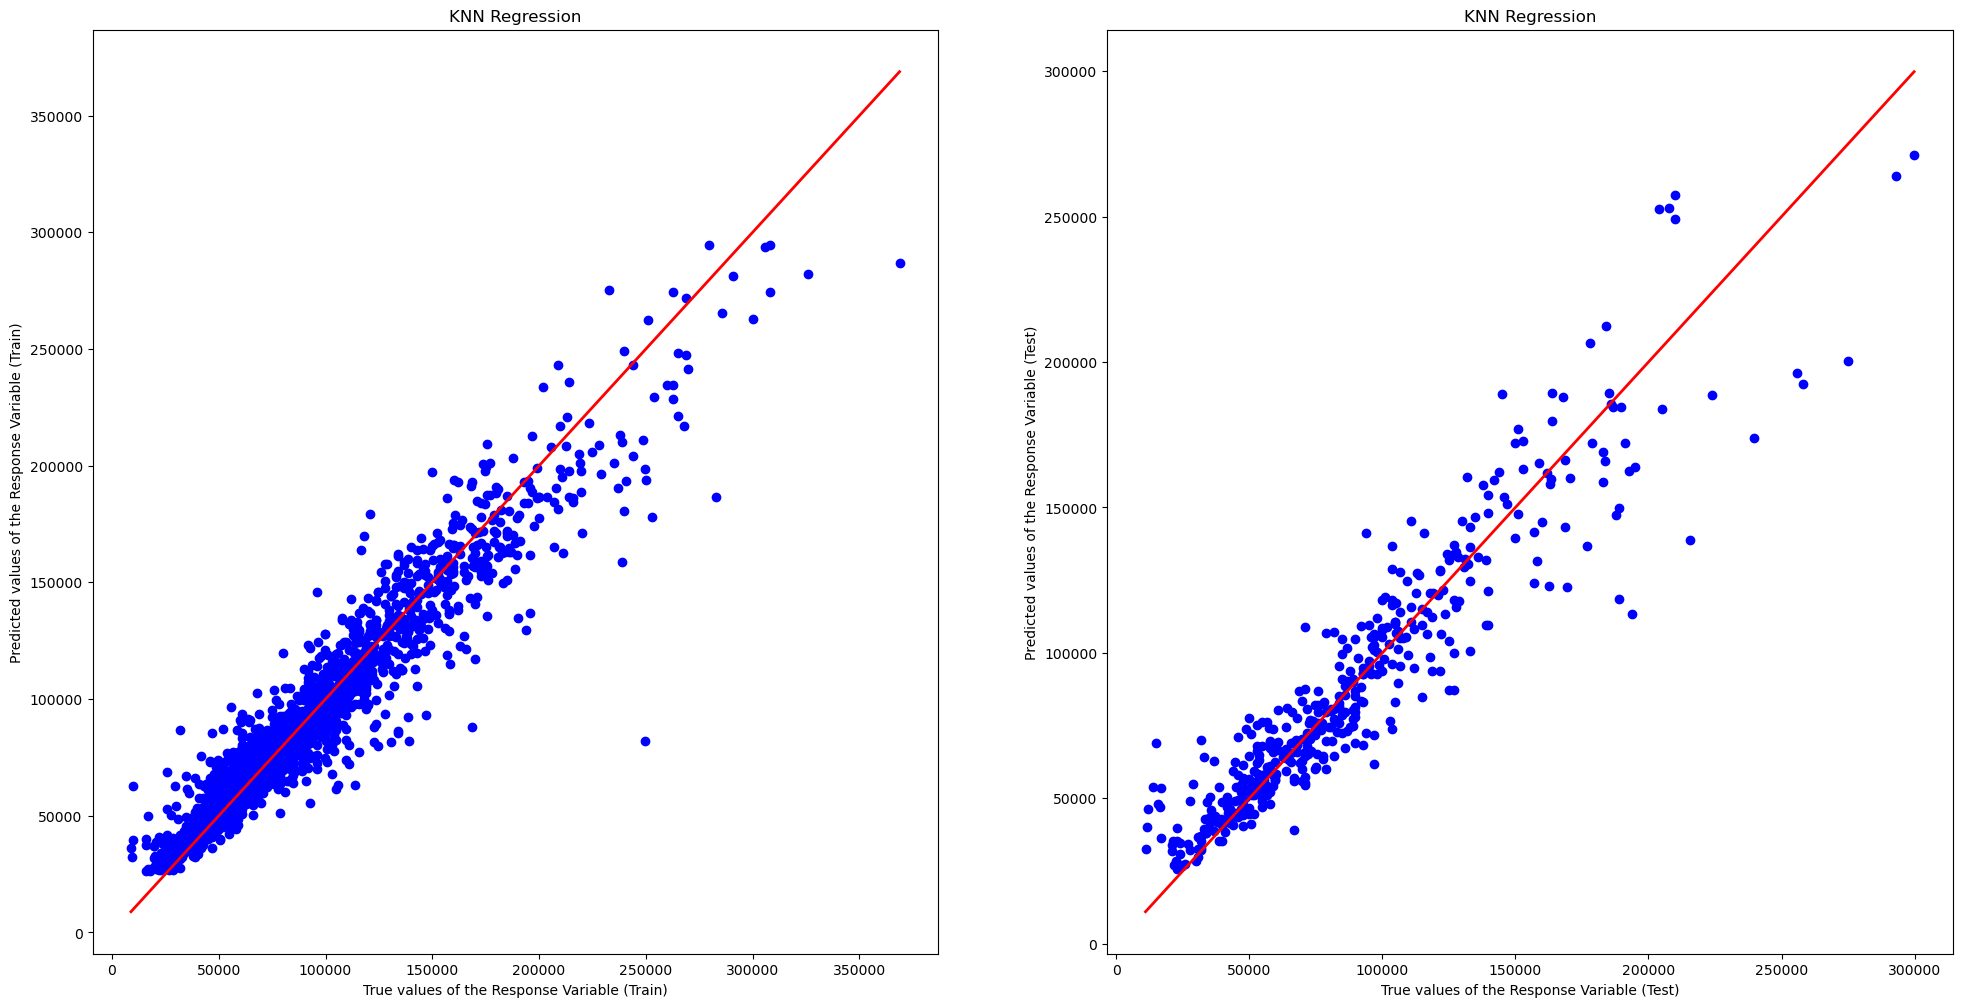

In [7]:
from sklearn.neighbors import KNeighborsRegressor
X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
knn = KNeighborsRegressor(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print()

#R2
train_explained_variance = r2_score(y_train, y_train_pred)
test_explained_variance = r2_score(y_test, y_test_pred)
print(f'Train Explained Variance Score: {train_explained_variance}')
print(f'Test Explained Variance Score: {test_explained_variance}')

# PLOTTING
f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
axes[0].set_title("KNN Regression")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
axes[1].set_title("KNN Regression")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()



In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform K-fold cross-validation
scores = cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

# Calculate the RMSE
rmse = np.sqrt(mean_score)
std_rmse = np.sqrt(std_score)

print(f"Root Mean Squared Error (K-fold Cross-Validation): {rmse:.2f} ± {std_rmse:.2f}")

explained_variances = cross_val_score(knn, X, y, cv=kf, scoring='explained_variance')

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

Mean Squared Error (K-fold Cross-Validation): 283841216.83 ± 47788296.37
Root Mean Squared Error (K-fold Cross-Validation): 16847.59 ± 6912.91
Average Explained Variance (K-fold Cross-Validation): 0.887


## NEURAL NETWORK REGRESSION

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
Train MSE: 121906976.81204626
Test MSE: 152502487.9716217

Train RMSE: 11041.1492523218
Test RMSE: 12349.18976984408

Train Explained Variance Score: 0.9520556384073458
Test Explained Variance Score: 0.9357029697005642


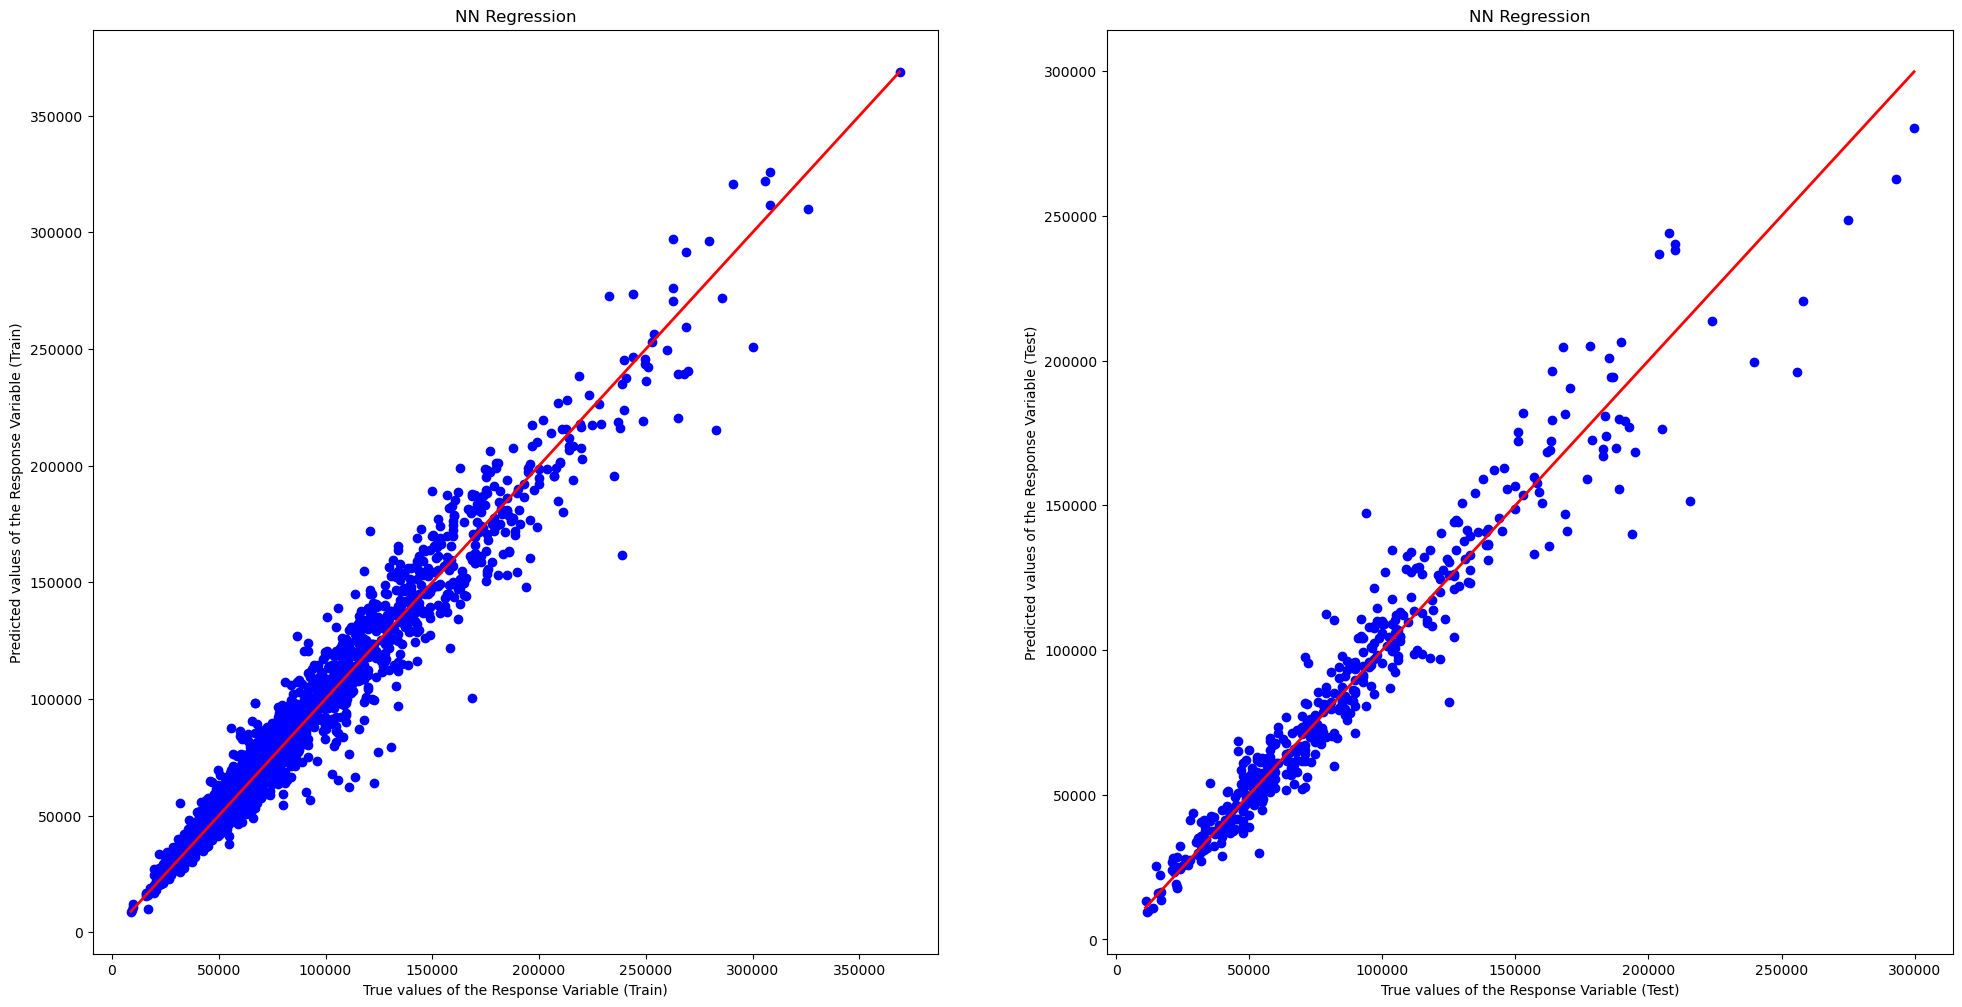

In [9]:
import tensorflow as tf
from tensorflow import keras

X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])

n_samples, n_features = 1000, 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(n_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=0)


# Make predictions on the test data
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print()

#R2
train_explained_variance = r2_score(y_train, y_train_pred)
test_explained_variance = r2_score(y_test, y_test_pred)
print(f'Train Explained Variance Score: {train_explained_variance}')
print(f'Test Explained Variance Score: {test_explained_variance}')

# PLOTTING
f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
axes[0].set_title("NN Regression")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
axes[1].set_title("NN Regression")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [10]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, explained_variance_score
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt

# Generate some dummy data
n_samples, n_features = 1000, 9
true_coef = np.random.randn(n_features)

# Define the custom scoring functions
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
evs_scorer = make_scorer(explained_variance_score, greater_is_better=True)

# Custom scikit-learn estimator class for the TensorFlow model
class NNRegressor(BaseEstimator):
    def __init__(self, n_features, n_epochs=300, batch_size=64):
        self.n_features = n_features
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu', input_shape=(self.n_features,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='mse')
        self.model.fit(X, y, epochs=self.n_epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

# Initialize the custom estimator
nn_regressor = NNRegressor(n_features)

# Perform K-fold cross-validation
n_splits = 5
mse_scores = cross_val_score(nn_regressor, X, y, cv=n_splits, scoring=mse_scorer, verbose=0)
evs_scores = cross_val_score(nn_regressor, X, y, cv=n_splits, scoring=evs_scorer, verbose=0)

# Compute the mean MSE and EVS scores across all folds
mean_mse = -np.mean(mse_scores)
mean_evs = np.mean(evs_scores)
print(f"Mean Squared Error: {mean_mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_mse):.2f}")
print(f"Mean Explained Variance Score: {mean_evs:.3f}")

/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/nathanpua/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error: 157749839.71
Root Mean Squared Error: 12559.85
Mean Explained Variance Score: 0.931


# ADDITIONAL MODELS WE USED BUT NOT PRESENTED:

## POLYNOMIAL REGRESSION (DEGREE 2)

Train MSE: 106257839.93623987
Test MSE: 351025296.4905352

Train RMSE: 10308.144349796421
Test RMSE: 18735.669096419675

Train Explained Variance Score: 0.9582102318244509
Test Explained Variance Score: 0.8520031743447997


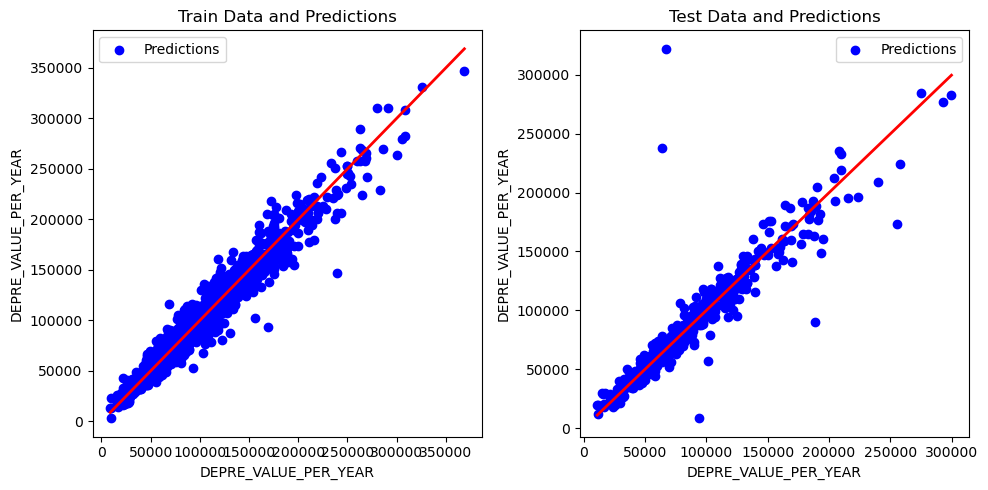

In [12]:
X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print()

#R2
train_explained_variance = r2_score(y_train, y_train_pred)
test_explained_variance = r2_score(y_test, y_test_pred)
print(f'Train Explained Variance Score: {train_explained_variance}')
print(f'Test Explained Variance Score: {test_explained_variance}')

# Plotting
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.scatter(y_train, y_train_pred, color='blue', label='Predictions')
plt.xlabel('DEPRE_VALUE_PER_YEAR')
plt.ylabel('DEPRE_VALUE_PER_YEAR')
plt.title('Train Data and Predictions')
plt.legend()

# Plotting test data
plt.subplot(1, 2, 2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions',)
plt.xlabel('DEPRE_VALUE_PER_YEAR')
plt.ylabel('DEPRE_VALUE_PER_YEAR')
plt.title('Test Data and Predictions')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
kf = KFold(n_splits=5, shuffle=True,random_state=4)
# Perform K-fold cross-validation
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

scores = cross_val_score(poly_reg, X_poly, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

# Calculate the RMSE
rmse = np.sqrt(mean_score)
std_rmse = np.sqrt(std_score)

print(f"Root Mean Squared Error (K-fold Cross-Validation): {rmse:.2f} ± {std_rmse:.2f}")

explained_variances = cross_val_score(poly_reg, X_poly, y, cv=kf, scoring='explained_variance')

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

Mean Squared Error (K-fold Cross-Validation): 175162253.10 ± 78460257.16
Root Mean Squared Error (K-fold Cross-Validation): 13234.89 ± 8857.78
Average Explained Variance (K-fold Cross-Validation): 0.929


Train MSE: 215688870.5514149
Test MSE: 228685506.74655992

Train RMSE: 14686.349803522144
Test RMSE: 15122.351230763023

Train Explained Variance Score: 0.9151724907658741
Test Explained Variance Score: 0.9035832191861581


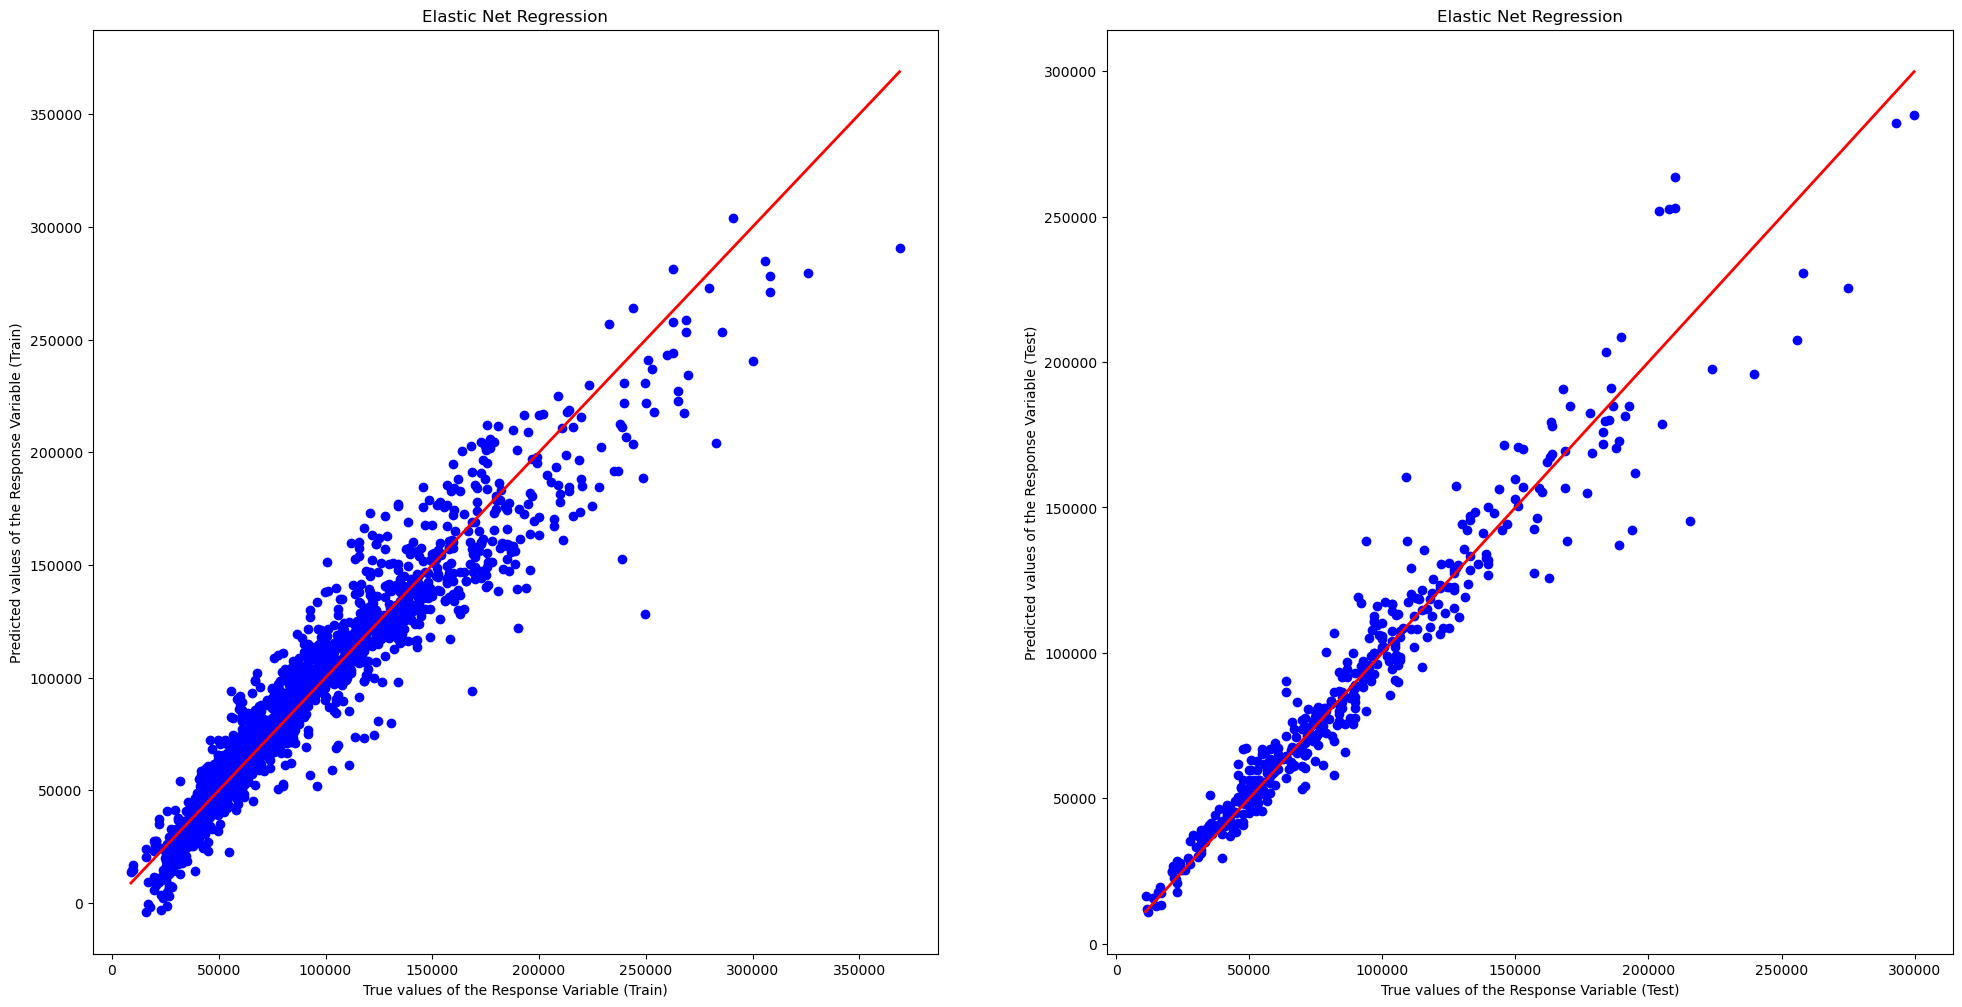

In [14]:
from sklearn.linear_model import ElasticNet
X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=0)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print()

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print()

#R2
train_explained_variance = r2_score(y_train, y_train_pred)
test_explained_variance = r2_score(y_test, y_test_pred)
print(f'Train Explained Variance Score: {train_explained_variance}')
print(f'Test Explained Variance Score: {test_explained_variance}')

# PLOTTING
f, axes = plt.subplots(1,2,figsize=(24,12))
axes[0].scatter(y_train,y_train_pred, color="blue")
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
axes[0].set_title("Elastic Net Regression")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
axes[1].set_title("Elastic Net Regression")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform K-fold cross-validation
scores = cross_val_score(elastic_net, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -np.mean(scores)
std_score = np.std(scores)

print(f"Mean Squared Error (K-fold Cross-Validation): {mean_score:.2f} ± {std_score:.2f}")

# Calculate the RMSE
rmse = np.sqrt(mean_score)
std_rmse = np.sqrt(std_score)

print(f"Root Mean Squared Error (K-fold Cross-Validation): {rmse:.2f} ± {std_rmse:.2f}")

explained_variances = cross_val_score(elastic_net, X, y, cv=kf, scoring='explained_variance')

# Calculate the average explained variance
avg_explained_variance = np.mean(explained_variances)

print(f"Average Explained Variance (K-fold Cross-Validation): {avg_explained_variance:.3f}")

Mean Squared Error (K-fold Cross-Validation): 223819050.18 ± 33677911.39
Root Mean Squared Error (K-fold Cross-Validation): 14960.58 ± 5803.27
Average Explained Variance (K-fold Cross-Validation): 0.911


### COMPARISONS OF OUR REGRESSION MODELS

![Regression Models Comparison](datasets/cmp.png)

### USEFULNESS OF OUR MODEL - BUILDING THE RECOMMENDATION SYSTEM

After comparing our regression models to predict a car's price, we decided to use the Random Forest regression model. Now we will compare the predicted vs the actual price to decide if a car is worth buying or not

In [16]:
X = pd.DataFrame(clean_df[['MILEAGE_KM','DEREG_VALUE_FROM_SCRAPE_DATE','OMV','COE_FROM_SCRAPE_DATE','CAR_AGE','ENGINE_CAPACITY_CC','CURB_WEIGHT_KG','POWER','DAYS_OF_COE_LEFT']])
y = pd.DataFrame(clean_df['PRICE'])

Here we will use our model to predict the depreciation for the 2298 listings in our cleaned dataframe  

We then store the results with only the predicted and actual depreciations

In [17]:
y_pred = rf_regressor.predict(X)
clean_df["PREDICTED_PRICE"] = y_pred
depre = pd.DataFrame(clean_df[["PRICE","PREDICTED_PRICE"]])
depre

,PRICE,PREDICTED_PRICE
0,59300.0,59756.165
1,152888.0,169935.675
2,213800.0,205732.100
3,147800.0,147740.245
4,94800.0,94465.020
...,...,...
2293,185000.0,186440.905
2294,126600.0,123013.440
2295,184000.0,181372.480
2296,96400.0,99983.220


Now we compare the Predicted vs Actual Price on the cars.  
We create a new column 'Recommended'. We recommend a car if the actual price is lower than the predicted. This means the car is likely to be a good deal!

In [18]:
depre["RECOMMENDED"] = np.where((clean_df['PRICE'] < clean_df['PREDICTED_PRICE']),True,False)
depre.head()

,PRICE,PREDICTED_PRICE,RECOMMENDED
0,59300.0,59756.165,True
1,152888.0,169935.675,True
2,213800.0,205732.100,False
3,147800.0,147740.245,False
4,94800.0,94465.020,False


We join back the Listing Urls into our dataframe and filter for all the Recommended Cars.  
We then convert the dataframe into a .csv file.  
Now we have a csv file with cars that are good deals and we can recommend this to consumers!

In [ ]:
cardata = pd.read_csv('datasets/car_data_updated.csv')
car_url = cardata["LISTING_URL"]
depre = depre.join(car_url)
depre.head()

In [ ]:
depre = depre[(depre["RECOMMENDED"] == True)]
depre.to_csv("datasets/reccomended.csv")